# Analyze Employee Exit Surveys

In this project I will work with exit surveys from employees of Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. My main goal is to answer the following questions:

1) Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

2) Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

(c) Miradiz Rakhmatov

# Data Exploration

Let's read the datasets and explore the content

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

pd.options.display.max_columns = 100

In [67]:
dete_survey.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [69]:
dete_survey.shape

(822, 56)

In [68]:
tafe_survey.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [70]:
tafe_survey.shape

(702, 72)

In [6]:
dete_survey.isnull().sum().sort_values(ascending=False)

Torres Strait                          819
South Sea                              815
Aboriginal                             806
Disability                             799
NESB                                   790
Business Unit                          696
Classification                         367
Opportunities for promotion             87
Career Aspirations                      76
Wellness programs                       56
Coach                                   55
Further PD                              54
Workplace issue                         34
Feedback                                30
Health & Safety                         29
Gender                                  24
Professional Development                14
Stress and pressure support             12
Skills                                  11
Age                                     11
Peer support                            10
My say                                  10
Performance of supervisor                9
Initiative 

1) The dete_survey dataset contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN. I'm going to read the dete_survey.csv file into pandas DataFrame again, but this time I will set 'Not Stated' values as NaN.

2) I will drop less important columns from both of the dataframes. Note that dropping them will not hinder me from asnwering the main questions.

In [7]:
# Read 'Not Stated' as NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values=('Not Stated')) 

In [8]:
# Let's drop the columns that we don't need for our analysis

dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

# Making sure the columns were dropped
print(dete_survey_updated.shape)
print(tafe_survey_updated.shape)

(822, 35)
(702, 23)


# Change Columns Names

Now I'm going to change column names for both dataframes for better referencing and eventually joining the two datasets.

### Dete survey columns:

In [9]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [10]:
# Reformatting column names
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" " , "_")

In [11]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

### Tafe survey columns:

In [12]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

In [13]:
# Change tafe_survey column names into the following:

mapping = {
'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}


In [14]:
tafe_survey_updated.rename(columns=mapping, inplace=True)

changed_columns = []
for k in mapping:
    changed_columns.append(mapping[k])
changed_columns

['id',
 'cease_date',
 'separationtype',
 'gender',
 'age',
 'employment_status',
 'position',
 'institute_service',
 'role_service']

In [15]:
## Changed tafe survey columns 
tafe_survey_updated[changed_columns].head()

,id,cease_date,separationtype,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,2010.0,Contract Expired,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,2010.0,Retirement,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,2010.0,Retirement,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,2010.0,Resignation,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,2010.0,Resignation,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [16]:
## Changed dete survey columns
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


#### You can see above that I matched some of the column names from dete_survey with tafe_survey since the data in those columns are of a similar context.



# Separeting Data 

Let's eliminate the data based on 'separationtype' column.
Specifically I will extract rows where 'separationtype' is due to resignation.

#### Eliminating tafe survey dataset:

In [17]:
## Seperation types
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [18]:
## Select the rows that are related to resignation tafe_survey:
## I inserted ".copy()" at the end of the code to avoid slicing warnings when dealing with the sliced dataset.

tafe_resignation = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

## Dataset after elimination
tafe_resignation['separationtype'].value_counts(dropna=False)

Resignation    340
Name: separationtype, dtype: int64

#### Eliminating defe survey dataset:

In [19]:
## Seperation types
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [20]:
## As you can see above there are three 'resignation' types which I'm going to group into one 'resignation'

dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].map(lambda x: "Resignation" if "Resignation" in x else x)

## Alternative ways to do the same thing:
## dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]
## dete_survey_updated[dete_survey_updated['separationtype'].isin(['Resignation-Other reasons', 'Resignation-Other employer','Resignation-Move overseas/interstate'])]

dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [21]:
# Above you can see that there is only one resignation type instead of three
# Select the rows that are related to resignation in dete_survey:

dete_resignation = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()

In [22]:
## Dataset after elimination
dete_resignation['separationtype'].value_counts()

Resignation    311
Name: separationtype, dtype: int64

# Start and End Dates

Now that I was able to select the resignation rows only, let's make sure the date columns are appropriately formatted. I will need start and end dates to calculate years worked (service years). Tefe dataset already has this column whereas dete doesn't which means I have to create one for dete.


* 'start_date' - start of employment

* 'cease_date' - end of employment


#### Date columns in dete dataset:

In [23]:
dete_resignation[['dete_start_date','cease_date']]

,dete_start_date,cease_date
3,2005.0,05/2012
5,1994.0,05/2012
8,2009.0,07/2012
9,1997.0,2012
11,2009.0,2012
...,...,...
808,2010.0,12/2013
815,2012.0,01/2014
816,2012.0,01/2014
819,2009.0,01/2014


In [24]:
## Unique values in the 'cease_date' column
dete_resignation['cease_date'].value_counts(dropna=False).sort_index()

01/2014     22
05/2012      2
05/2013      2
06/2013     14
07/2006      1
07/2012      1
07/2013      9
08/2013      4
09/2010      1
09/2013     11
10/2013      6
11/2013      9
12/2013     17
2010         1
2012       126
2013        74
NaN         11
Name: cease_date, dtype: int64

In [25]:
## Now I'm going to extract only years from string "MM/YYYY"
## Convery the column into float datatype since I have NaN values in the column (int can't have NaN values)
## Below you can see a few ways to complete this task

dete_resignation['cease_date'] = dete_resignation['cease_date'].map(lambda x: x.split('/')[1] if '/' in str(x) else x)
dete_resignation['cease_date'] = dete_resignation['cease_date'].astype(float)

#dete_resignation['cease_date'] = dete_resignation['cease_date'].str.split('/').str[-1].astype(float)  
#dete_resignation['cease_date'] = dete_resignation['cease_date'].str.extract(r"([0-9]{4})", expand=False).astype(float)


In [26]:
## Cease date values after transformation
dete_resignation['cease_date'].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [27]:
## Let's make sure start date doesn't have any wrong formatting like the cease date
dete_resignation['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [28]:
## As you can see above formatting in start date looks right
## Now lets calculate the difference between start and end dates to find the years worked

dete_resignation['institute_service'] = dete_resignation['cease_date'] - dete_resignation['dete_start_date']
dete_resignation['institute_service'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

#### There is already 'institute_service' column in 'tafe_resignation' dataset. It means that I don't have to find the difference between start and end dates in 'tafe_resignation' dataset.

# Dissatisfaction columns

Now I will select the rows where resignation is related to dissatisfaction.
I will perform the elimination for both datasets.

#### Tafe dataset:

In [29]:
tafe_resignation['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [30]:
tafe_resignation['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

As you can see above, there are two columns in tafe_resignation that show whether employees were dissatisfied or no. Now I'm going to create a function that will return false for '-' values and true for any other values. 

* False = not dissatisfied

* True = dissatisfied

In [31]:
def update(element):
    if pd.isnull(element):
        return element
    elif element == '-':
        return False
    else:
        return True

In [32]:
## Assigning two column names to variable 'factors'
factors = ['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']

## After applying the function, I will use pd.DataFrame.any() to calculate the result between two values (True, False)
tafe_resignation['dissatisfied'] = tafe_resignation[factors].applymap(update).any(skipna=False, axis=1).copy()
tafe_resignation['dissatisfied'].value_counts(dropna=False)


False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

#### Dete dataset:

Now that tafe dataset has the boolean values for 'dissatisfied' column, let's do the same for dete dataset.

Note that dete dataset already has bunch of boolean columns that contain information attributing to somewhat dissatisfaction. 

In [33]:
# Let's check the content of those columns 
dissatisfaction_columns = ['job_dissatisfaction', 
                           'dissatisfaction_with_the_department',
                           'physical_work_environment',
                           'lack_of_recognition',
                           'lack_of_job_security',
                           'work_location',
                           'employment_conditions',
                           'work_life_balance',
                           'workload'
                          ]
dete_resignation[dissatisfaction_columns].head()

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False


In [34]:
## I'm going to use pd.DataFrame.any() to calculate whether employee is dissatisfied 
## If there is one True in any columns horizontally then employee was dissatisfied 
dete_resignation['dissatisfied'] = dete_resignation[dissatisfaction_columns].any(axis=1, skipna=False)
dete_resignation['dissatisfied'].value_counts(dropna=False)


False    162
True     149
Name: dissatisfied, dtype: int64

# Combining the datasets:

In [35]:
## In order to distinguish each dataset after I combine them, I'm going to create institute column.
dete_resignation['institute'] = 'DETE'
tafe_resignation['institute'] = 'TAFE'

In [36]:
## Lets combined the datasets
combined = pd.concat([dete_resignation, tafe_resignation], axis=0)

In [37]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

# Drop columns

Lets drop columns that have we dont need for our analysis

In [38]:
combined.notnull().sum().sort_values(ascending=False)

id                                                     651
institute                                              651
separationtype                                         651
dissatisfied                                           643
cease_date                                             635
position                                               598
employment_status                                      597
age                                                    596
gender                                                 592
institute_service                                      563
WorkArea                                               340
Institute                                              340
Contributing Factors. Study                            332
Contributing Factors. NONE                             332
Contributing Factors. Interpersonal Conflict           332
Contributing Factors. Other                            332
Contributing Factors. Dissatisfaction                  3

In [39]:
## I'm going to drop columns that have less than 500 non-NaN values
combined.dropna(axis=1, thresh=500, inplace=True)

In [40]:
combined.notnull().sum().sort_values(ascending=False)

institute            651
separationtype       651
id                   651
dissatisfied         643
cease_date           635
position             598
employment_status    597
age                  596
gender               592
institute_service    563
dtype: int64

In [41]:
## Let's inspect our new combined dataset
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(2), object(8)
memory usage: 55.9+ KB


# Clean 'institute_service' column

Note that institute service column for dete dataset was created by finding a difference between start and end date whereas tafe dataset already contained institute service column. However, it was not 'cleaned'. After combining 'cleaned' and not 'cleaned' institute service columns we have to clean it again.
Let's clean 'institute_service' column and convert it into numberic data type.

In [42]:
combined['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
39.0                   3
32.0                   3
21.0                   3
26.0                   2
28.0                   2
30.0                   2
36.0                   2
25.0                   2


In [43]:
## This function will remove the following words:
def no_words(element):  
    if element == 'Less than 1 year':
        return 0.0 
    elif element == 'More than 20 years':
        return 21.0
    else:
        return element

In [44]:
combined['institute_service'] = combined['institute_service'].map(no_words)
combined['institute_service'].value_counts(dropna=False)

0.0      93
NaN      88
1-2      64
3-4      63
5-6      33
11-20    26
5.0      23
1.0      22
7-10     21
3.0      20
6.0      17
4.0      16
9.0      14
2.0      14
7.0      13
21.0     13
8.0       8
13.0      8
15.0      7
20.0      7
10.0      6
12.0      6
14.0      6
17.0      6
22.0      6
18.0      5
16.0      5
23.0      4
24.0      4
11.0      4
19.0      3
39.0      3
32.0      3
25.0      2
26.0      2
28.0      2
30.0      2
36.0      2
35.0      1
41.0      1
38.0      1
29.0      1
34.0      1
33.0      1
31.0      1
42.0      1
27.0      1
49.0      1
Name: institute_service, dtype: int64

### Now that words are removed, let's split the strings that have '-' and return a mean of two substrings.

In [45]:
## Let's see what datatypes are in 'institute_service' column which is object datatype 
combined['institute_service'].map(lambda x: type(x)).value_counts()

<class 'float'>    444
<class 'str'>      207
Name: institute_service, dtype: int64

In [46]:
## Since there are float and str in the column, I have to convert dtype into str to check if there is '-' in the element
def avg_splitter(element):
    if '-' in str(element):
        spl = element.split('-')
        return (float(spl[0]) + float(spl[1]))/2
    return float(element)


In [47]:
## Transform the column
combined['institute_service'] = combined['institute_service'].map(avg_splitter)
combined['institute_service'].value_counts(dropna=False).sort_index()

0.0     93
1.0     22
1.5     64
2.0     14
3.0     20
3.5     63
4.0     16
5.0     23
5.5     33
6.0     17
7.0     13
8.0      8
8.5     21
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
15.5    26
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0    13
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
NaN     88
Name: institute_service, dtype: int64

### Groupping :

Now that I was able clean 'institute_service' column, let's group ages into several groups

In [48]:
## Let's create stratas for each range of age
def categorize(element):
    if pd.isnull(element):
        return element
    elif element < 3:
        return 'New'
    elif element >= 3 and element <= 6:
        return 'Experienced'
    elif element >= 7 and element <= 10:
        return 'Established'
    elif element >= 11:
        return 'Veteran'

In [49]:
combined['service_cat'] = combined['institute_service'].map(categorize)
combined['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

### Fill NaN values:

In [50]:
combined['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [51]:
## Let's fill NaN values in 'dissatisfied' with the most frequent value in the column
## Above we can see that the most frequent value is 'False'
combined['dissatisfied'].fillna(False, inplace=True)
combined['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

# Analysis:

## Question 1:
#### Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

Since'dissatisfied' column has True and False which are 1 and 0 respectively, I'm going to find proportion of dissatisfied employees by years of experience (service_cat)

In [52]:
q1 = combined.groupby('service_cat')['dissatisfied'].mean().reset_index().sort_values('dissatisfied')
q1

,service_cat,dissatisfied
2,New,0.295337
1,Experienced,0.343023
3,Veteran,0.485294
0,Established,0.516129


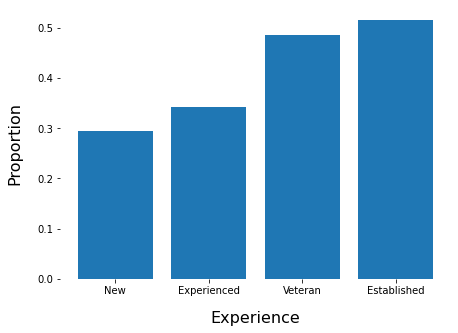

In [53]:
fig, ax = plt.subplots(figsize=(7,5))
ax.bar(q1['service_cat'] ,q1['dissatisfied'])
for location in ['left', 'right', 'top', 'bottom']:
     ax.spines[location].set_visible(False)   
ax.set_xlabel('Experience', labelpad=15, size=16)
ax.set_ylabel('Proportion', labelpad=15, size=16)
plt.show()

## Findings:

As you can see above, there are less new employees that are resigning due to some type (there are many) of job dissatisfaction. Whereas employees that have been working at the company for more than 7 years (Established and Veterans) are resigning due to some type of dissatisfaction. In other words, relatively new employees tend to stick with the company regardless dissatisfactions.

## Question 2:
#### Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [54]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    float64
 8   dissatisfied       651 non-null    bool   
 9   institute          651 non-null    object 
 10  service_cat        563 non-null    object 
dtypes: bool(1), float64(3), object(7)
memory usage: 56.6+ KB


In [55]:
combined['age'].value_counts()

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
36  40           32
26  30           32
31-35            29
21-25            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [56]:
## Let's isolate years only from the age column
combined.loc[combined['age'] == '56 or older', 'age'] = '56'
combined.loc[combined['age'] == '61 or older', 'age'] = '61'
combined.loc[combined['age'] == '20 or younger', 'age'] = '20'

In [57]:
combined['age'].value_counts(dropna=False)

51-55     71
NaN       55
41-45     48
41  45    45
46-50     42
36-40     41
46  50    39
26-30     35
21  25    33
31  35    32
36  40    32
26  30    32
31-35     29
21-25     29
56        29
56-60     26
61        23
20        10
Name: age, dtype: int64

In [58]:
## Let's 
combined['age'] = combined['age'].str.replace('  ', '-')
combined['age'].value_counts(dropna=False)

41-45    93
46-50    81
36-40    73
51-55    71
26-30    67
21-25    62
31-35    61
NaN      55
56       29
56-60    26
61       23
20       10
Name: age, dtype: int64

In [59]:
## Let's see what datatypes are included in age column (object)
combined['age'].map(lambda x: type(x)).value_counts()

<class 'str'>      596
<class 'float'>     55
Name: age, dtype: int64

In [60]:
## Since there are float and str inside age column, I need to have all the strings formatted accordingly and converted into float
## Function that takes string numbers and returns the mean of those numbers 
def ss(x):
    if '-' in str(x):
        spl = x.split('-')
        return (float(spl[0])+float(spl[1]))/2
    return float(x) 
                
combined['age'] = combined['age'].map(ss)
combined['age'].value_counts(dropna=False)


43.0    93
48.0    81
38.0    73
53.0    71
28.0    67
23.0    62
33.0    61
NaN     55
56.0    29
58.0    26
61.0    23
20.0    10
Name: age, dtype: int64

In [61]:
## Let's fill NaN values with the mean value of the column
## Now that we don't have NaN values we can convert the values from float into int
combined['age'] = combined['age'].fillna(combined['age'].mean()).astype(int)

In [62]:
q2 = combined.groupby('age')['dissatisfied'].mean().reset_index()
q2

,age,dissatisfied
0,20,0.200000
1,23,0.306452
2,28,0.417910
3,33,0.377049
4,38,0.342466
5,41,0.254545
6,43,0.376344
7,48,0.382716
8,53,0.422535
9,56,0.206897


In [63]:
## A function to categorize age into groups 
def age_cat(x):
    if x >= 20 and x < 30:
        return '20-29'
    elif x >= 30 and x < 40:
        return '30-39'
    elif x >= 40 and x < 50:
        return '40-50'
    else:
        return '50-61'

In [64]:
combined['age_cat'] = combined['age'].map(age_cat)
combined['age_cat'].value_counts().sort_index()

20-29    139
30-39    134
40-50    229
50-61    149
Name: age_cat, dtype: int64

In [65]:
## Let's group by the age category to find avarage dissatisfaction rate of the employees that left the company
q2 = combined.groupby('age_cat')['dissatisfied'].mean().reset_index()
q2 

,age_cat,dissatisfied
0,20-29,0.352518
1,30-39,0.358209
2,40-50,0.349345
3,50-61,0.422819


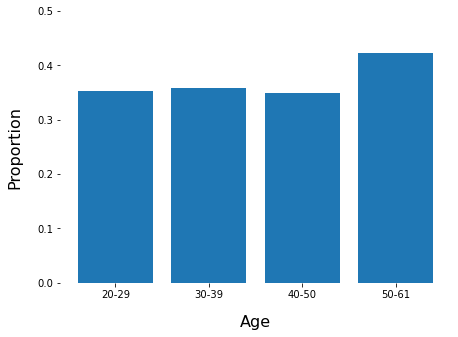

In [66]:
fig, ax = plt.subplots(figsize=(7,5))
ax.bar(q2['age_cat'] ,q2['dissatisfied'])
for location in ['left', 'right', 'top', 'bottom']:
     ax.spines[location].set_visible(False)   
ax.set_xlabel('Age', labelpad=15, size=16)
ax.set_ylabel('Proportion', labelpad=15, size=16)
ax.set_ylim(0, 0.50)
plt.show()

## Findings:

Just a little over 40 percent of the employees that are between 50-61 years old resigned due to some type of dissatisfaction. Whereas employees between 20-50 show fairly the same numbers. In other words, regardless of age difference, 35-45% of resigned employees quit their job specifically due to some type of dissatisfaction. This could be a bit loss for a company as the percentage of resignations due to job dissatisfaction is pretty high. 